In [1]:
import numpy as np
import graphviz
import random
import time

In [2]:
def plot_dfa(dfa):
    dot = graphviz.Digraph(comment="DFA", format="png", graph_attr={"rankdir": "LR"})

    for state in dfa.Q:
        if state in dfa.F:
            dot.node(str(state), shape="doublecircle", fontsize="20")
        else:
            if state == dfa.q0:
                dot.node(str(state), shape="circle", style="filled", fillcolor="lightblue", label="start", fontsize="20")
            else:
                dot.node(str(state), shape="circle", fontsize="20")

    for (start_state, symbol), end_state in dfa.delta.items():
        dot.edge(str(start_state), str(end_state), label=symbol, fontsize="20")

    # Agregar un nodo especial para la flecha de inicio
    dot.node("start", shape="point", width="0", height="0", fontsize="20")
    dot.edge("start", str(dfa.q0), label="start", fontsize="14")

    return dot

In [3]:
class DFA :

    def __init__(self,Q,Sigma,delta,q0,F) :
        self.Q = Q # set of states
        self.Sigma = Sigma # set of symbols
        self.delta = delta # transition function as a dictionary
        self.q0 = q0 # initial state
        self.F = F # set of final states

    def __repr__(self) :
        return f"DFA({self.Q},\n\t{self.Sigma},\n\t{self.delta},\n\t{self.q0},\n\t{self.F})"

    def run (self,w) :
        q = self.q0
        while w!="" :
            q = self.delta[(q,w[0])]
            w = w[1:]
        return q in self.F

In [4]:
parity_automaton = DFA({"q0","q1","q2", "q3"},{"0","1"},
                       {("q0","0"):"q2",("q0","1"):"q1",
                        ("q1","0"):"q3",("q1","1"):"q0",
                        ("q2","0"):"q0",("q2","1"):"q3",
                        ("q3","0"):"q1",("q3","1"):"q2"},
                        "q0",
                        {"q0"})

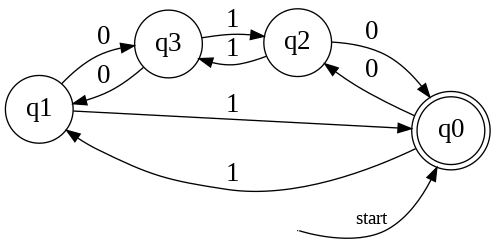

In [5]:
dot = plot_dfa(parity_automaton)
dot.render("DFA_parity_automaton", format="png")
from IPython.display import Image
Image("DFA_parity_automaton.png")

In [6]:
def generate_random_string(n, alphabet):
    return ''.join(random.choice(alphabet) for _ in range(n))

In [7]:
#def parity_automaton(string):
#    ones = string.count("1")
#    zeros = string.count("0")
#    return ((zeros % 2 == 0)and(ones % 2 == 0))

In [8]:
def create_file(fileName):
  with open(fileName, "w") as f:
    f.write("")

In [9]:
def write(string, NameFile):
  with open(NameFile, "a") as f:
      f.write(string + "\n")

In [10]:
def printState(state, string, string_acceptance="Not processed"):
  if state=="on":
    print(f"Protocol State: {state}, String: {string} -> {string_acceptance}")
  else:
    print(f"Protocol State: {state}, String: {string}")

In [17]:
# Función principal
def main():
    alphabet = "01"
    state = "off" #InitialState
    string_length = 64
    number_of_strings = 100
    processed_strings = 0
    create_file("allStrings.txt")
    create_file("accepted.txt")
    create_file("not_accepted.txt")
    string_state = False #processed or not processed string

    string = ""

    while processed_strings < (number_of_strings+1):
        string = generate_random_string(string_length, alphabet) if string_state else string #ternary operator
        write(string, "allStrings.txt")
        random_state = random.choice([True, False])

        if random_state == 0:
          state = "off"
          string_state = False
          printState(state, string)
          wait_time = 2
          continue
        else:  # state == "on"
          state = "on"
          string_state = True

          if (state=="on" and string==""):
            string = generate_random_string(string_length, alphabet)
            write(string, "allStrings.txt")

          if (parity_automaton.run(string)):
            write(string, "accepted.txt")
            string_acceptance = "Accepted"
          else:
            write(string, "not_accepted.txt")
            string_acceptance = "Not accepted"
          printState(state, string, string_acceptance)
          wait_time = 2

        time.sleep(wait_time)
        processed_strings+=1


In [18]:
if __name__ == "__main__":
    main()

Protocol State: off, String: 
Protocol State: off, String: 
Protocol State: on, String: 0000000110010110111010100111000101110110000010110010000011110001 -> Accepted
Protocol State: off, String: 0011000111010000101111001110110000111011010111001000101000100000
Protocol State: on, String: 0011000111010000101111001110110000111011010111001000101000100000 -> Not accepted
Protocol State: on, String: 0011111010111010000010100100001011011011111000101010101000001001 -> Accepted
Protocol State: on, String: 0100111100100000011101110011100100011110000110000100000101100110 -> Accepted
Protocol State: off, String: 1011100100101101001111000101110100101100111000111101000010111001
Protocol State: on, String: 1011100100101101001111000101110100101100111000111101000010111001 -> Accepted
Protocol State: off, String: 0001100110100110101111101011010100011010010100001011110000100001
Protocol State: on, String: 0001100110100110101111101011010100011010010100001011110000100001 -> Accepted
Protocol State: off, Str